<a href="https://colab.research.google.com/github/jyotidabass/binary-classification-on-images/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### dependecies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import preprocessing
import pickle
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation

### loading the data

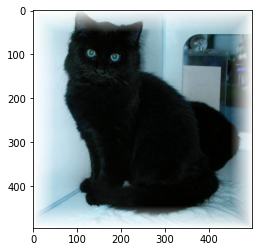

In [ ]:
DATAPATH = '/content/drive/MyDrive/Colab Notebooks/tensorflow/dataset/training_set'
CATEGORIES = ['cats', 'dogs']

for category in CATEGORIES:
  path = os.path.join(DATAPATH, category)
  for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
    plt.imshow(img_arr)
    # printing one image
    break
  break

### creating the training data

In [ ]:
IMG_SIZE = 60

train_data = []

def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATAPATH, category)
    # indexing the classes
    ind_class = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        train_data.append([ind_class, new_img_arr])
      except Exception as e:
        print(e)

create_train_data()

#### shuffling the data

In [ ]:
train_data = np.array(utils.shuffle(train_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


#### seperating features and label

In [ ]:
X = []
y = []

for label, features in train_data:
  y.append(label)
  X.append(features)

print(np.array(X).shape)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

pickle.dump(X, open('/content/drive/MyDrive/Colab Notebooks/tensorflow/X.pkl','wb'))
pickle.dump(y, open('/content/drive/MyDrive/Colab Notebooks/tensorflow/y.pkl','wb'))

X.shape

(8000, 60, 60)


(8000, 60, 60, 1)

### creating the model and normalizing features

In [ ]:
train_X = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/tensorflow/X.pkl', 'rb'))
train_y = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/tensorflow/y.pkl', 'rb'))

train_X = train_X/226.0

model = Sequential()
# ADDING LAYERS

# input layer
model.add(Conv2D(14, (3, 3), input_shape=train_X.shape[1:]))

model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(14, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(14))

# output neuron
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### training the model

In [ ]:
try:
  model.fit(train_X, train_y, batch_size=40, epochs=15, validation_split=0.1)
except Exception as e:
  print(e)

Epoch 1/15
180/180 [==============================] - 13s 69ms/step - loss: 0.6790 - accuracy: 0.5689 - val_loss: 0.6458 - val_accuracy: 0.6675
Epoch 2/15
180/180 [==============================] - 12s 68ms/step - loss: 0.6178 - accuracy: 0.6632 - val_loss: 0.5906 - val_accuracy: 0.7075
Epoch 3/15
180/180 [==============================] - 12s 68ms/step - loss: 0.5558 - accuracy: 0.7168 - val_loss: 0.5569 - val_accuracy: 0.7387
Epoch 4/15
180/180 [==============================] - 12s 68ms/step - loss: 0.5049 - accuracy: 0.7551 - val_loss: 0.5528 - val_accuracy: 0.7487
Epoch 5/15
180/180 [==============================] - 12s 68ms/step - loss: 0.4799 - accuracy: 0.7740 - val_loss: 0.5590 - val_accuracy: 0.7275
Epoch 6/15
180/180 [==============================] - 12s 68ms/step - loss: 0.4605 - accuracy: 0.7829 - val_loss: 0.5535 - val_accuracy: 0.7462
Epoch 7/15
180/180 [==============================] - 12s 69ms/step - loss: 0.4453 - accuracy: 0.7900 - val_loss: 0.5598 - val_accuracy: